# Testing Parseval's theorem on LS

In [19]:
import numpy as np

# Generate a signal
np.random.seed(42)  # for reproducibility
N = 1024
t = np.linspace(0, 10, N)  # evenly sampled time vector
f0 = 3  # frequency of the sine wave
a0 = 2  # amplitude of the sine wave
noise_level = 0.10  # noise level

# Create a sine wave with noise
signal = a0 * np.sin(2 * np.pi * f0 * t) + noise_level * np.random.randn(N)

In [20]:
from scipy.signal import lombscargle
from astropy.timeseries import LombScargle
import numpy as np

def fourier_periodogram(t, y):
    N = len(t)
    frequency = np.fft.fftfreq(N, t[1] - t[0])
    y_fft = np.fft.fft(y)
    positive = (frequency > 0)
    return frequency[positive], (1. / N) * abs(y_fft[positive]) ** 2

frequency, PSD_fourier = fourier_periodogram(t, signal)

ls = LombScargle(t, signal, normalization='psd')
PSD_LS = ls.power(frequency)

# Compute the Lomb-Scargle periodogram with scipy
angular_frequency = 2 * np.pi * frequency
P_scipy = lombscargle(t, signal, freqs=angular_frequency, normalize=False, precenter=True)

# Comparing the results 
if np.allclose(PSD_fourier, P_scipy, PSD_LS):
    print("The results are the same")


The results are the same


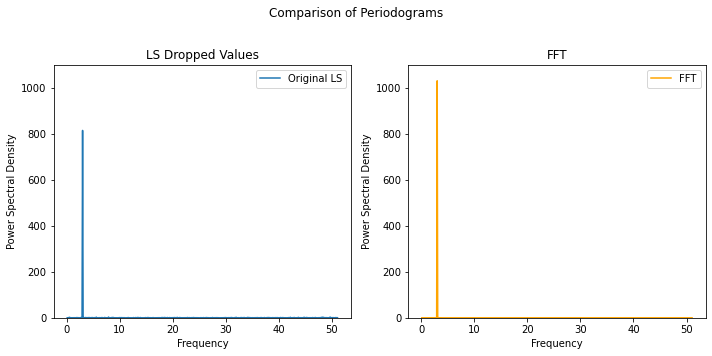

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Randomly choose 5% of the points to drop from the signal
drop_indices = np.random.choice(N, size=int(N * 0.20), replace=False)
signal_dropped = np.delete(signal, drop_indices)
t_dropped = np.delete(t, drop_indices)

# Compute the Lomb-Scargle periodogram for the original signal using Astropy
PSD_LS_dropped = lombscargle(t_dropped, signal_dropped, frequency * 2 * np.pi, normalize=False, precenter=True)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original Lomb-Scargle periodogram
ax1.plot(frequency, PSD_LS_dropped, label='Original LS')
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Power Spectral Density')
ax1.set_title('LS Dropped Values')
ax1.set_ylim(0, 1100)
ax1.legend()

# Plot the Lomb-Scargle periodogram after dropping values
ax2.plot(frequency, PSD_fourier, label='FFT',color = "orange")
ax2.set_xlabel('Frequency')
ax2.set_ylabel('Power Spectral Density')
ax2.set_title('FFT')
ax2.set_ylim(0, 1100)
ax2.legend()

plt.suptitle('Comparison of Periodograms')
plt.tight_layout(rect=[0, 0, 1, 0.96]) # This ensures that the plots are not too close to each other
plt.show()
